# Title: Heart Disease Prediction

`Autor`: [Sumit Sharma](http://sumit-portfolio.free.nf)\
`Date`: 01-01-2025\
`Dataset`: [Heart Disease UCI](https://archive.ics.uci.edu/dataset/45/heart+disease)

## Meta-Data (About Dataset)
### Context
This is a multivariate type of dataset which means providing or involving a variety of separate mathematical or statistical variables, multivariate numerical data analysis. It is composed of 14 attributes which are age, sex, chest pain type, resting blood pressure, serum cholesterol, fasting blood sugar, resting electrocardiographic results, maximum heart rate achieved, exercise-induced angina, oldpeak — ST depression induced by exercise relative to rest, the slope of the peak exercise ST segment, number of major vessels and Thalassemia. This database includes 76 attributes, but all published studies relate to the use of a subset of 14 of them. The Cleveland database is the only one used by ML researchers to date. One of the major tasks on this dataset is to predict based on the given attributes of a patient that whether that particular person has heart disease or not and other is the experimental task to diagnose and find out various insights from this dataset which could help in understanding the problem more.

### Content
#### Column Descriptions:
* `id` (Unique id for each patient)
* `age` (Age of the patient in years)
* `origin` (place of study)
* `sex` (Male/Female)
* `cp` chest pain type
    1. typical angina 
    2. atypical angina
    3. non-anginal
    4. asymptomatic
* `trestbps` resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
* `chol` (serum cholesterol in mg/dl)
* `fbs` (if fasting blood sugar > 120 mg/dl)
* `restecg` (resting electrocardiographic results)
* -- `Values`: [normal, stt abnormality, lv hypertrophy]
* `thalach`: maximum heart rate achieved
* `exang`: exercise-induced angina (True/ False)
* `oldpeak`: ST depression induced by exercise relative to rest
* `slope`: the slope of the peak exercise ST segment
* `ca`: number of major vessels (0-3) colored by fluoroscopy
* `thal`: [normal; fixed defect; reversible defect]
* `num`: the predicted attribute

### Acknowledgements
#### Creators:
* Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
* University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
* University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
* V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

#### Relevant Papers:
* Detrano, R., Janosi, A., Steinbrunn, W., Pfisterer, M., Schmid, J., Sandhu, S., Guppy, K., Lee, S., & Froelicher, V. (1989). International application of a new probability algorithm for the diagnosis of coronary artery disease. American Journal of Cardiology, 64,304--310.
* David W. Aha & Dennis Kibler. "Instance-based prediction of heart-disease presence with the Cleveland database."
* Gennari, J.H., Langley, P, & Fisher, D. (1989). Models of incremental concept formation. Artificial Intelligence, 40, 11--61. 

#### Citation Request:
The authors of the databases have requested that any publications resulting from the use of the data include the names of the principal investigator responsible for the data collection at each institution. 

**They would be:**

* Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
* University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
* University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
* V.A. Medical Center, Long Beach and Cleveland Clinic Foundation:Robert Detrano, M.D., Ph.D.

## Aims and Objectives

We will fill after doing some exploratory data analysis (EDA).

### Import Libraries

Let's start the project by impoprting att the libraries that we wilt need in this project.

In [218]:
# importing libraries

# To handle the data
import pandas as pd
import numpy as np

# To visualize the data
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# To preprocess the data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer, KNNImputer

# Import IterativeImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Machine learning 
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

# For classification
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

# Metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')


### Load the Dataset

In [219]:
# load the data from csv file placed locally in our system
df = pd.read_csv('heart_disease_uci.csv')

# Display the first 5 rows of the dataset
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


## Exploratory Data Analysis (EDA)

### Explore each column

In [220]:
# exploring the datatype of each columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [221]:
# checking the datashape
df.shape

(920, 16)

In [222]:
# id column
print("(",df['id'].min(),",",df['id'].max(),")")

( 1 , 920 )


### Let's explore the age column

In [223]:
# value count of age column
df['age'].describe()

count    920.000000
mean      53.510870
std        9.424685
min       28.000000
25%       47.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: age, dtype: float64

In [224]:
# age column
print("(",df['age'].min(),",",df['age'].max(),")")

( 28 , 77 )


<Axes: xlabel='age', ylabel='Count'>

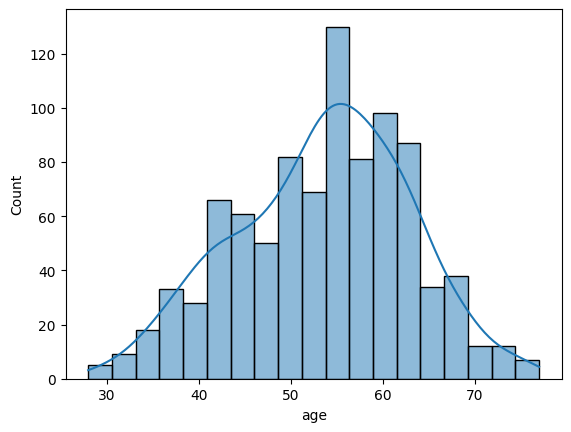

In [225]:
# draw a histogram to see the distribution of age column
sns.histplot(df['age'], kde=True)

Mean:  53.51086956521739
Median:  54.0
Mode:  54


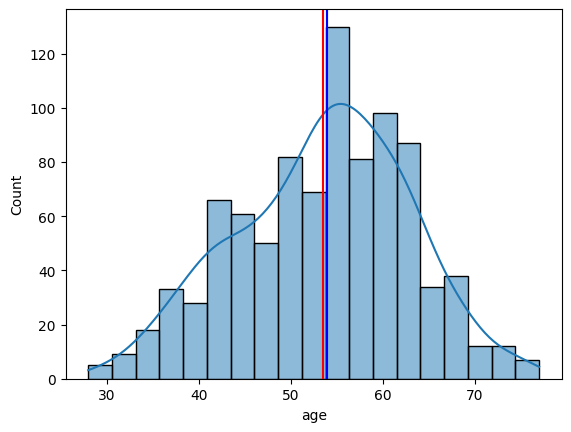

In [226]:
# draw the mean, median and mode of age column using sns
sns.histplot(df['age'], kde=True)
plt.axvline(df['age'].mean(), color='red', label='mean')
plt.axvline(df['age'].median(), color='green', label='median')
plt.axvline(df['age'].mode()[0], color='blue', label='mode')

# print the value of mean, median and mode
print("Mean: ", df['age'].mean())
print("Median: ", df['age'].median())
print("Mode: ", df['age'].mode()[0])

Let's explore the gender based distribution of the dataset of the age column.

In [227]:
# Plot the histogram of age column using plotly and coloring this by sex.
fig = px.histogram(df, x='age',color='sex')
fig.show()

In [228]:
# Find the value count of sex column
df["sex"].value_counts()

sex
Male      726
Female    194
Name: count, dtype: int64

In [229]:
# Calculate the percentage of male and female value counts in dataset
male_count = 726
female_count = 194
total_count = male_count + female_count

# calculate percentage
male_percentage = (male_count / total_count) * 100
female_percentage = (female_count / total_count) * 100

# display the result
print(f"Male percentage in the data : {male_percentage:.2f}%")
print(f"Female percentage in the data : {female_percentage:.2f}%")

# difference 
difference_percentage = ((male_count - female_count) / female_count) * 100
print(f"Males are {difference_percentage:.2f}% more than females in the data")

Male percentage in the data : 78.91%
Female percentage in the data : 21.09%
Males are 274.23% more than females in the data


In [230]:
# find the values count of age column grouping by sex column
df.groupby('sex')['age'].value_counts()

sex     age
Female  54     15
        51     11
        62     10
        43      9
        48      9
               ..
Male    77      2
        28      1
        31      1
        33      1
        76      1
Name: count, Length: 91, dtype: int64

In [231]:
# Let's deal with the dataset column
df["dataset"].unique()

array(['Cleveland', 'Hungary', 'Switzerland', 'VA Long Beach'],
      dtype=object)

In [232]:
# Find unique value count in the dataset column
df["dataset"].value_counts()

dataset
Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: count, dtype: int64

In [233]:
# plot the count plot of dataset column
# sns.countplot(data=df, x='dataset',hue='sex')

# Better plots using plotly
# plot the count plot of dataset column using plotly
fig = px.bar(df, x='dataset' ,color='sex')
fig.show()

# print the value count of dataset column grouped by sex column
df.groupby("sex")['dataset'].value_counts()

sex     dataset      
Female  Cleveland         97
        Hungary           81
        Switzerland       10
        VA Long Beach      6
Male    Hungary          212
        Cleveland        207
        VA Long Beach    194
        Switzerland      113
Name: count, dtype: int64

In [234]:
# make a plot of age column using plot ly and coloring this by dataset column
fig = px.histogram(df, x='age',color='dataset')
fig.show()

# print the mean, median and mode of age column grouped by dataset column
print("Mean: ", df.groupby('dataset')['age'].mean())
print("-------------------------------------------------------------------")
print("Median: ", df.groupby('dataset')['age'].median())
print("-------------------------------------------------------------------")
print("Mode: ", df.groupby('dataset')['age'].agg(pd.Series.mode))

Mean:  dataset
Cleveland        54.351974
Hungary          47.894198
Switzerland      55.317073
VA Long Beach    59.350000
Name: age, dtype: float64
-------------------------------------------------------------------
Median:  dataset
Cleveland        55.5
Hungary          49.0
Switzerland      56.0
VA Long Beach    60.0
Name: age, dtype: float64
-------------------------------------------------------------------
Mode:  dataset
Cleveland              58
Hungary                54
Switzerland            61
VA Long Beach    [62, 63]
Name: age, dtype: object


### Let's explore the cp (Chest Pain) column

In [235]:
# value count of cp column
df["cp"].value_counts()

cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64

In [236]:
# draw the plot of age column grouped by cp column using plotly
fig = px.histogram(df, x='age',color='cp')
fig.show()

<Axes: xlabel='cp', ylabel='count'>

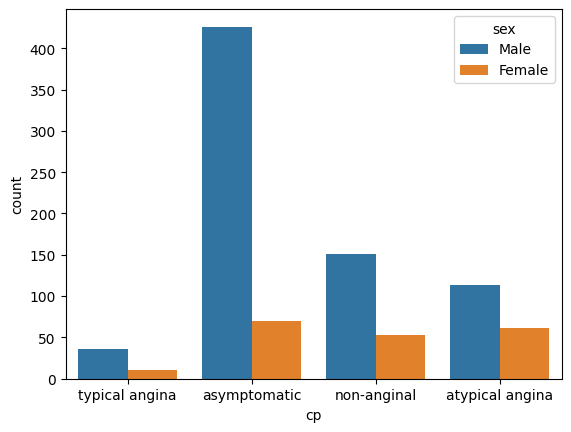

In [237]:
# Count plot of cp column by sex column
sns.countplot(data=df, x='cp',hue='sex')


<Axes: xlabel='cp', ylabel='count'>

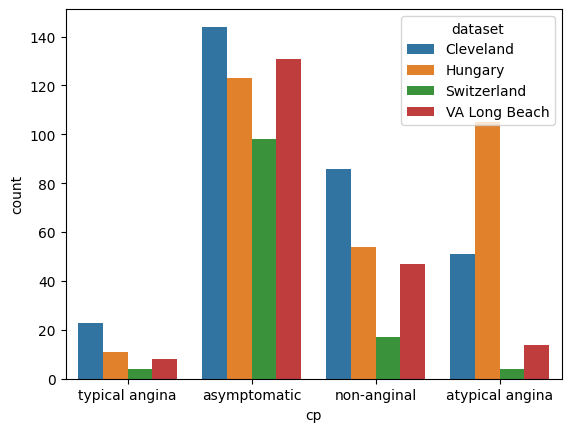

In [238]:
# Count plot of cp column by dataset column
sns.countplot(data=df, x='cp',hue='dataset')


### Let's explore the trestbps (Resting Blood Pressure) column

The normal resting blood pressure is 120/80 mm Hg.

`What will happen if blood pressure is high or low and then you can bin the data based on those values.`

In [239]:
# Find the value count of tresbps column
df['trestbps'].describe()

count    861.000000
mean     132.132404
std       19.066070
min        0.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

<Axes: xlabel='trestbps', ylabel='Count'>

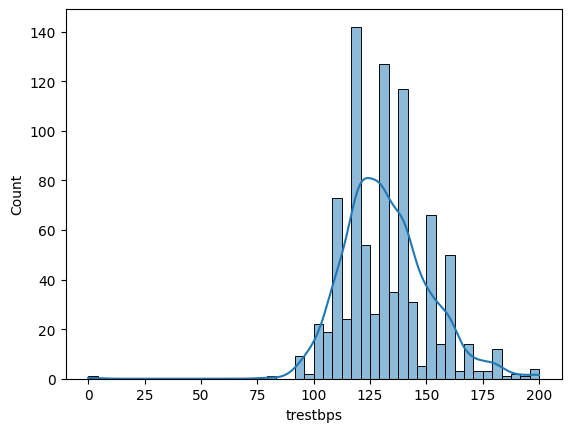

In [240]:
# Hisplot of trestbps column
sns.histplot(df['trestbps'], kde=True)

In [241]:
# Deal with missing values in trestbps column
# find the percentage of missing values in trestbps column
print(f"Percentage of missing values in trestbps column: {df['trestbps'].isnull().sum() / df.shape[0] * 100:.2f}%")

Percentage of missing values in trestbps column: 6.41%


In [242]:
# Fill the missing values in trestbps column using Iterative Imputer
# create an object of IterativeImputer
imputer_1 = IterativeImputer(max_iter=10, random_state=42)

# fit the imputer object on the trestbps column
df['trestbps'] = imputer_1.fit_transform(df[['trestbps']])

# check the missing values in trestbps column
print(f"Missing values in trestbps column: {df['trestbps'].isnull().sum()}")


Missing values in trestbps column: 0


In [243]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  920 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [244]:
# impute missing values using IterativeImputer of columns ca, oldpeak, thalch, chol
# create an object of IterativeImputer
imputer_2 = IterativeImputer(max_iter=10, random_state=42)

# fit_transform the imputer object on the columns
df[['ca', 'oldpeak', 'thalch', 'chol']] = imputer_2.fit_transform(df[['ca', 'oldpeak', 'thalch', 'chol']])


## let's impute the missing values in the thal column using ML Models

In [245]:
print(f"The total Missing Values in thal column are: {df['thal'].isnull().sum()}")

The total Missing Values in thal column are: 486


In [246]:
df['thal'].value_counts()

thal
normal               196
reversable defect    192
fixed defect          46
Name: count, dtype: int64

In [247]:
# Define the function to impute the missing values in thal column

def impute_categorical_with_rf(dataframe, column_name):
    """
    Impute missing values in a categorical column using a Random Forest Classifier.

    Parameters:
    dataframe (pd.DataFrame): The input DataFrame.
    column_name (str): The name of the categorical column to impute.

    Returns:
    pd.DataFrame: The DataFrame with the missing values imputed.
    """
    df = dataframe.copy()

    # Check if the column has missing values
    if df[column_name].isnull().sum() == 0:
        print(f"No missing values in column '{column_name}'.")
        return df

    # Split the data into rows with and without missing values in the target column
    df_missing = df[df[column_name].isnull()]
    df_not_missing = df[~df[column_name].isnull()]

    # Prepare the features (X) and target (y) for the non-missing rows
    X = df_not_missing.drop(columns=[column_name])
    y = df_not_missing[column_name]

    # Convert categorical variables to dummy/indicator variables
    X = pd.get_dummies(X, drop_first=True, dummy_na=True)
    X_missing = pd.get_dummies(df_missing.drop(columns=[column_name]), drop_first=True, dummy_na=True)
   
    
    # Align the columns of X and X_missing to ensure they have the same feature set
    X_missing = X_missing.reindex(columns=X.columns, fill_value=0)

    # Split the non-missing data for training and validation
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # Train the Random Forest Classifier
    rf = RandomForestClassifier(random_state=42, n_jobs=-1)
    rf.fit(X_train, y_train)

    # Validate the model
    y_val_pred = rf.predict(X_val)
    accuracy = accuracy_score(y_val, y_val_pred)
    print(f"Validation Accuracy: {accuracy:.2f}")

    # Predict missing values
    y_missing_pred = rf.predict(X_missing)

    # Impute the predicted values back into the original DataFrame
    df.loc[df[column_name].isnull(), column_name] = y_missing_pred

    return df



In [248]:
# use the function to impute the missing values in the thal column
df = impute_categorical_with_rf(df, 'thal')

# check the missing values in thal column
print(f"Missing Values in thal column : {df['thal'].isnull().sum()}")

Validation Accuracy: 0.69
Missing Values in thal column : 0


In [249]:
df['thal'].value_counts()

thal
reversable defect    494
normal               320
fixed defect         106
Name: count, dtype: int64

In [250]:
# use the function to impute the missing values in the slope column
df = impute_categorical_with_rf(df, 'slope')

# check the missing values in slope column
print(f"Missing Values in slope column : {df['slope'].isnull().sum()}")

print(f"Updated value count of slope column: \n{df['slope'].value_counts()}")

Validation Accuracy: 0.74
Missing Values in slope column : 0
Updated value count of slope column: 
slope
flat           544
upsloping      311
downsloping     65
Name: count, dtype: int64


In [251]:
# # use the function to impute the missing values in the fbs column
# df['fbs'] = df['fbs'].astype('category')
# df = impute_categorical_with_rf(df, 'fbs')

# # check the missing values in fbs column
# print(f"Missing Values in fbs column : {df['fbs'].isnull().sum()}")

# print(f"Updated value count of fbs column: \n{df['fbs'].value_counts()}")

In [252]:
# # use the function to impute the missing values in the exang column
# df = impute_categorical_with_rf(df, 'exang')

# # check the missing values in exang column
# print(f"Missing Values in slope column : {df['exang'].isnull().sum()}")

# print(f"Updated value count of slope column: \n{df['exang'].value_counts()}")

In [253]:
# use the function to impute the missing values in the restecg column
df = impute_categorical_with_rf(df, 'restecg')

# check the missing values in restecg column
print(f"Missing Values in slope column : {df['restecg'].isnull().sum()}")

print(f"Updated value count of slope column: \n{df['restecg'].value_counts()}")

Validation Accuracy: 0.61
Missing Values in slope column : 0
Updated value count of slope column: 
restecg
normal              553
lv hypertrophy      188
st-t abnormality    179
Name: count, dtype: int64


In [254]:
# Let's impute the missing values of other columns
(df.isnull().sum() / len(df) * 100).sort_values(ascending=False)


fbs         9.782609
exang       5.978261
sex         0.000000
id          0.000000
dataset     0.000000
cp          0.000000
trestbps    0.000000
age         0.000000
chol        0.000000
restecg     0.000000
thalch      0.000000
oldpeak     0.000000
slope       0.000000
ca          0.000000
thal        0.000000
num         0.000000
dtype: float64

#### Output
1. The minimum age to have a heart disease starts from 28 years old.
2. Most of the people get the heart disease at the age of 53-54 years.
3. Most of the males and females get the heart disease at the age of 54-55 years.
4. Male percentage in the data : 78.91%
5. Female percentage in the data : 21.09%
6. Males are 274.23% more than females in the data
7. We have highest number of people from Cleveland (304) and lowest from Switzerland (123).
    1. The highest number of females are from Cleveland (97) and lowest from VA Long Beach (6).
    2. The highest number of males are from Hungary (212) and lowest from Switzerland (113).
8. The average age of the people in each country differs as in Cleveland ratio of age is higher than Hungary people.
9. `Obervation of cp column`
   